In [1]:
# Copyright (c) 2025 Devansh R Agrawal - All rights reserved.

In [2]:
ENV["JULIA_PKG_PRECOMPILE_AUTO"]=0

0

In [3]:
] activate .

  Activating project at `~/research2/14_2025_winter/gatekeeper-formation-flight/GatekeeperFormationFlight/examples`


In [4]:
] st

Status `~/research2/14_2025_winter/gatekeeper-formation-flight/GatekeeperFormationFlight/examples/Project.toml`
  [459566f4] DiffEqCallbacks v4.4.0
  [c4b27c1d] Dubins v1.2.1 `~/research2/14_2025_winter/Dubins.jl`
⌅ [f6369f11] ForwardDiff v0.10.38
  [c276d96c] GatekeeperFormationFlight v1.0.0-DEV `..`
  [20393b10] InfiniteOpt v0.5.9
  [a98d9a8b] Interpolations v0.15.1
  [b6b21f68] Ipopt v1.9.0
  [ab2f91bb] OSQP v0.8.1
  [1dea7af3] OrdinaryDiffEq v6.93.0
  [91a5bcdd] Plots v1.40.13
  [90137ffa] StaticArrays v1.9.13
  [37e2e46d] LinearAlgebra v1.11.0
  [9a3f8284] Random v1.11.0
  [2f01184e] SparseArrays v1.11.0
Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated`


In [5]:
using GatekeeperFormationFlight
using Plots, LinearAlgebra, StaticArrays, Random
using Dubins

GFF = GatekeeperFormationFlight


GatekeeperFormationFlight

In [6]:
# wez = Cbez(; x=0.5, y=0.5, ψ = 2π * rand(), R=0.15, t=0.15, v=1.0)
# wez = Cbez(; x=0.5, y=0.5, ψ = 2π * rand(), R = rand(), t=rand(), v=rand(), μ=rand())
# wez2 = Cardioid(0.5, 0.5)

wez = Cbez(rand(), rand(), 2π*rand())

Cbez{Float64}(0.8772626327319577, 0.5199394562927595, 3.5214950451008176, 0.9, 0.25, 1.0, 0.1, 0.1)

In [7]:
robot = Robot(0.0,0.0,π/4)

Robot{Float64}(0.0, 0.0, 0.7853981633974483)

┌ Plots | Warning ] : Keyword argument markerstrokestyle not supported with Plots.GRBackend().  Choose from: annotationcolor, annotationfontfamily, annotationfontsize, annotationhalign, annotationrotation, annotations, annotationvalign, arrow, aspect_ratio, axis, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, colorbar_titlefont, colorbar_titlefontcolor, colorbar_titlefontrotation, colorbar_titlefontsize, connections, contour_labels, discrete_values, fill, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, fontfamily, fontfamily_subplot, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, formatter, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefont, guidefontcolor, guidefontfamily, guidefonthalign, gui

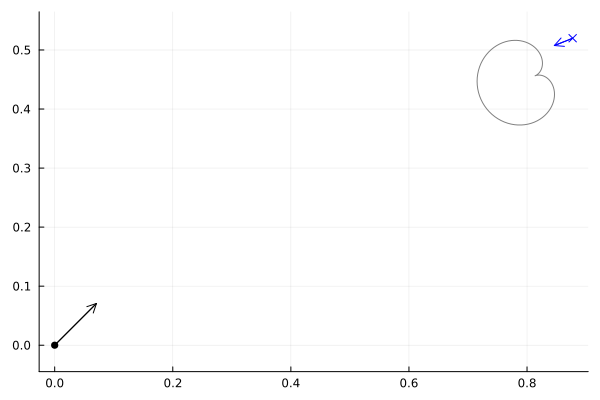

In [8]:
plot()
plot!(robot)
plot!(wez, robot)
# plot!(wez2, robot)

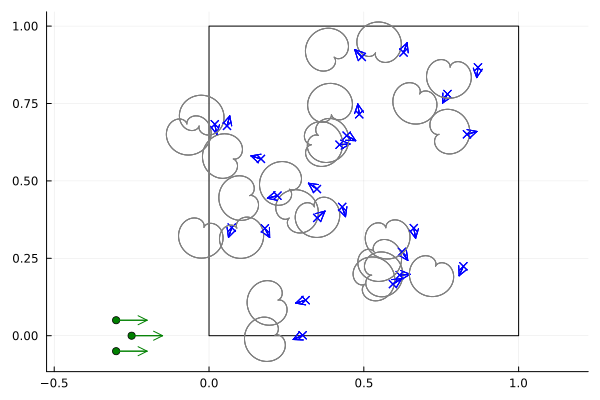

In [9]:

# create an environment
function create_random_scenario(N_wezes = 24)
    wezes_1 = [Cbez(
            rand(), 
            rand(),
            2π*rand(),
        ) for i = 1:N_wezes/2]

    wezes_2 = [Cbez(
            0.5 + 0.2 * randn(),
            0.5 + 0.2 * randn(),
            2π*rand(),
        ) for i = 1:N_wezes/2]
    
    # wezes_2 = [Cbez(0.5 + 0.2 * randn(), 0.5 + 0.2 * randn(), 2π*rand(), R= 0.05, t=0.05) for i = 1:N_wezes/2]
    wezes = vcat(wezes_1, wezes_2)
    return wezes
end

# change the seed to get different environments
# seed = 27182818 with 24 wezes is a good looking env.
# seed = 1, N = 24 is good
# seed = 2, N = 24 is good
# seed = 2718, N = 24 is good
# seed = 271828, N = 24 is good
Random.seed!(1)
wezes = create_random_scenario(24)

# create a set of robots
leader_robot = Robot(-0.25, 0.0, 0.0)
follower_robots = [Robot(-0.3, -0.05, 0.0), Robot(-0.3, 0.05, 0.0)]
robots = vcat(leader_robot, follower_robots...)

plotscenario(wezes, robots)

In [10]:

# plan a path for the leader using RRT*
domain = ((@SVector [0, 0, -1.0 * π]), (@SVector [1, 1, 1.0 * π]))
turning_radius = 0.1
rrt_problem = DubinsRRTProblem(domain, turning_radius, wezes)


DubinsRRTProblem{Float64, Cbez{Float64}}(([0.0, 0.0, -3.141592653589793], [1.0, 1.0, 3.141592653589793]), 0.1, Cbez{Float64}[Cbez{Float64}(0.07336635446929285, 0.34924148955718615, 4.390857551235271, 0.9, 0.25, 1.0, 0.1, 0.1), Cbez{Float64}(0.6282647403425017, 0.9149290036628314, 1.2114491231010585, 0.9, 0.25, 1.0, 0.1, 0.1), Cbez{Float64}(0.7701803478856664, 0.7805192636751863, 4.211392655002153, 0.9, 0.25, 1.0, 0.1, 0.1), Cbez{Float64}(0.16771210647092682, 0.5710874493423871, 2.8450802625834792, 0.9, 0.25, 1.0, 0.1, 0.1), Cbez{Float64}(0.30232547191787174, 0.0013502779247226426, 3.5627148125272763, 0.9, 0.25, 1.0, 0.1, 0.1), Cbez{Float64}(0.6159379234562881, 0.19573857852575793, 0.07830071569449379, 0.9, 0.25, 1.0, 0.1, 0.1), Cbez{Float64}(0.3119923865097316, 0.11479916823306191, 3.430925227253167, 0.9, 0.25, 1.0, 0.1, 0.1), Cbez{Float64}(0.6232150941621899, 0.2708693898950604, 5.310435222511279, 0.9, 0.25, 1.0, 0.1, 0.1), Cbez{Float64}(0.49359045543272007, 0.9003405842788204, 2.3383

In [11]:
# start the tree with the root node
nodes = [Node(SVector(0, 0, 0.0))]

# add 1000 nodes to the tree
nodes = rrt_star(rrt_problem, nodes, 2000)

# see if there is a path 
success_code, waypoints = get_best_path(rrt_problem, nodes, @SVector [1.0, 1.0, 0])

(true, SVector{3, Float64}[[0.0, 0.0, 0.0], [0.30961034091504797, 0.21634571091317406, 0.3018295833045708], [0.4486452797541326, 0.2809777886106173, 0.4193952694899921], [0.6720442395641852, 0.6295473432426884, 1.3773435598034227], [0.6739570498585122, 0.6936947317224629, 1.7142976858662198], [0.7628169845904933, 0.8563114058712424, 1.0994431189623717], [1.0, 1.0, 0.0]])

In [12]:
@assert success_code

# prepend and append the start and the goal
waypoints = [SVector(leader_robot), waypoints..., SVector(1.25, 1, 0.0)]

path = DubinsPath[]
# add all the waypoints to the path
for i = 2:length(waypoints)
    e, p = dubins_shortest_path(waypoints[i-1], waypoints[i], rrt_problem.turning_radius)
    @assert e == Dubins.EDUBOK
    push!(path, p)
end

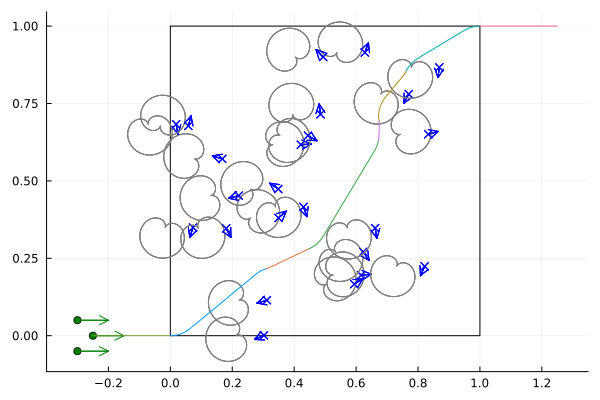

In [13]:
plotscenario(wezes, robots)
for p in path
    plot!(p)
end
plot!()

[ Plots | Info ] : Saved animation to /Users/devanshagrawal/research2/14_2025_winter/gatekeeper-formation-flight/GatekeeperFormationFlight/examples/tmp.gif


Plots.AnimatedGif("/Users/devanshagrawal/research2/14_2025_winter/gatekeeper-formation-flight/GatekeeperFormationFlight/examples/tmp.gif")
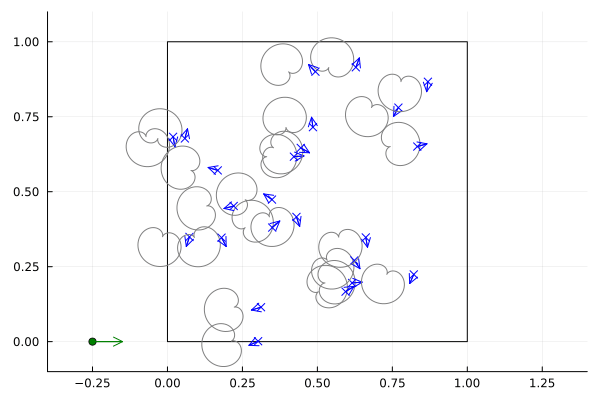

In [14]:
@gif for t in range(0, total_path_length(path), length=120)
    r = Robot(get_reference_state_and_input(path, t)[1])

    plotscenario(wezes, [r])
    xlims!(-0.4, 1.4)
    ylims!(-0.1, 1.1)
end

In [15]:
# solve for the trajectory using gatekeeper

In [16]:
# offsets = [SVector(robot) - SVector(leader_robot) for robot in robots]

# # For all three robots, we can define the set of problems as 
# gk_problems = [
#     GatekeeperProblem(;
#         wezes = wezes,
#         reference_path = path,
#         offset = offsets[i],
#         switch_step_size = 2e-3,
#         reconnection_step_size = 0.01,
#         max_Ts_horizon = 0.5,
#         integration_max_step_size = 1e-3,
#         collision_check_step_size = 1e-3,
#     ) for i = 1:length(robots)
# ]


In [17]:

# # We can now `solve` the problems and plot the solutions:
# tspan = [0.0, total_path_length(path)]
# gk_solutions = [
#     simulate_closed_loop_gatekeeper(SVector(robots[i]), tspan, gk_problems[i]) for
#     i = 1:length(robots)
# ]


In [18]:

# Tmax = total_path_length(path)

# # plot reference path
# plotscenario(wezes, robots)
# # plot offset path
# for i = 1:length(robots)
#     plot!(
#         τ -> get_reference_state_and_input(path, τ, offsets[i])[1][1],
#         τ -> get_reference_state_and_input(path, τ, offsets[i])[1][2],
#         0.0,
#         Tmax,
#         linestyle = :dash,
#         label = false,
#         linecolor = :black,
#     )
# end
# # plot the gk solution
# for i = 1:length(robots)
#     plot!(
#         t -> gk_solutions[i](t)[1],
#         t -> gk_solutions[i](t)[2],
#         0.0,
#         Tmax,
#         label = "gk_sol_$(i)",
#         color = (i == 1 ? :black : :green),
#         linewidth = 2,
#     )
# end

# plot!(aspect_ratio = :equal)


In [19]:
# # Finally, lets animate the solutions:
# anim = @animate for t in range(0, Tmax, length=120)

#     # grab the states
#     robots_ = [Robot(gk_solutions[i](t)) for i=1:length(gk_solutions)]

#     # start the plot
#     plot()

#     # plot the reference paths
#     for i=1:3
#         plot!(
#             τ -> get_reference_state_and_input(path, τ, offsets[i])[1][1],
#             τ -> get_reference_state_and_input(path, τ, offsets[i])[1][2],
#             0, Tmax;
#             label=false, color=:gray, linestyle=:dash)
#     end

#     # plot the trace of the robots upto this point of time
#     for i=1:3
#         plot!(τ -> gk_solutions[i](τ)[1], τ -> gk_solutions[i](τ)[2], 0.0, t, label="gk_sol_$(i)", color=(i==1 ? :black : :green), linewidth=2)
#     end

#     # plot the current state of affairs
#     plotscenario!(wezes, robots_)
#     title!("Gatekeeper")
#     plot!(legend=false)

#     xlims!(-0.4, 1.4)
#     ylims!(-0.1, 1.1)
# end

# gif(anim, "gatekeeper.gif")

In [20]:
# now try running the CBF-QP

The QP

$$
\begin{align}
\operatorname{minimize } \ & \Vert u - u_d \Vert ^2\\
\text{such that } \ & Lfh_1(x) + Lgh_1(x) u \geq -\alpha h_1(x)\\
& Lfh_2(x) + Lgh_2(x) u \geq -\alpha h_2(x)\\
& \vdots\\
& Lfh_N(x) + Lgh_N(x) u \geq -\alpha h_N(x)\\
& u \in \mathcal{U}
\end{align}
$$


in standard form is

$$
\begin{align}
\operatorname{minimize } \ & \frac{1}{2} u^T u - u_d^T u\\
&  
\begin{bmatrix}
-L_fh_1(x) - \alpha h_1(x) \\
-L_fh_2(x) - \alpha h_2(x) \\
\vdots\\
-L_fh_N(x) - \alpha h_N(x) \\
\end{bmatrix}
\leq
\begin{bmatrix}
L_gh_1(x) \\
L_gh_2(x) \\
\vdots \\
L_ghN(x)
\end{bmatrix}
u \leq 
\begin{bmatrix}
\infty\\
\infty\\
\vdots\\
\infty
\end{bmatrix}\\
& u \in \mathcal{U}
\end{align}
$$



and if the first is infeasible, we solve the relaxed one instead: 

$$
\begin{align}
\operatorname{minimize } \ & \frac{1}{2} \begin{bmatrix}u\\s\end{bmatrix}^T \begin{bmatrix}\epsilon \\ & \epsilon \\ && 1 \end{bmatrix} \begin{bmatrix} u \\ s \end{bmatrix} - \begin{bmatrix} u_d \\ 0\end{bmatrix}^T  \begin{bmatrix}u \\ s \end{bmatrix}\\
&  
\begin{bmatrix}
-L_fh_1(x) - \alpha h_1(x) \\
-L_fh_2(x) - \alpha h_2(x) \\
\vdots\\
-L_fh_N(x) - \alpha h_N(x) \\
\hline
0 \\
0 \\
\vdots \\
0
\end{bmatrix}
\leq
\begin{bmatrix}
L_gh_1(x) & 1 \\
L_gh_2(x) & & 1 \\
\vdots & & & \ddots \\
L_gh_N(x) & & &  & 1 \\
\hline
0 & 1\\
0 & & 1 \\ 
\vdots & & & \ddots \\
0 & & & & 1
\end{bmatrix}
\begin{bmatrix} u  \\ s \end{bmatrix} \leq 
\begin{bmatrix}
\infty\\
\infty\\
\vdots\\
\infty\\
\hline
\infty \\
\infty \\
\vdots \\
\infty
\end{bmatrix}\\
& u \in \mathcal{U}
\end{align}
$$

for $\epsilon = 10^{-5}$


In [21]:
include("cbf-qp.jl")

Main.CBFQP

In [22]:
# @time res = CBFQP.cbf_qp_controller(SVector(leader_robot), [1.0, 0.], wezes; α=100.0)

In [23]:
offsets = [SVector(robot) - SVector(leader_robot) for robot in robots]

3-element Vector{SVector{3, Float64}}:
 [0.0, 0.0, 0.0]
 [-0.04999999999999999, -0.05, 0.0]
 [-0.04999999999999999, 0.05, 0.0]

In [24]:
# cbf_probs = [CBFQP.CBFProblem(; 
#     wezes = wezes, 
#     reference_path = path,
#     offset = offsets[i],
#     α = 100.0
#     )
#     for i=1:length(robots)
# ]

In [25]:
# tspan = (0, total_path_length(path))
# cbf_sols = [
#     CBFQP.simulate_closed_loop_cbf(SVector(robots[i]), tspan, cbf_probs[i])
#     for i=1:length(robots)
#     ]

In [26]:
# plotscenario(wezes, robots)
# plot!(t->get_reference_state(path, t)[1], t->get_reference_state(path, t)[2], tspan..., linestyle=:dash) 
# for i=1:length(robots)
#     plot!(t -> cbf_sols[i](t)[1], t -> cbf_sols[i](t)[2], tspan...)
# end
# plot!()

In [27]:
# @gif for t in range(tspan..., length=120)

#     # grab the states
#     robots_ = [Robot(cbf_sols[i](t)) for i=1:length(cbf_sols)]

#     # start the plot
#     plot()

#     # plot the reference paths
#     for i=1:3
#         plot!(
#             τ -> get_reference_state(path, τ, offsets[i])[1],
#             τ -> get_reference_state(path, τ, offsets[i])[2],
#             tspan...;
#             label=false, color=:gray, linestyle=:dash)
#     end

#     # plot the trace of the robots upto this point of time
#     for i=1:3
#         plot!(τ -> cbf_sols[i](τ)[1], τ -> cbf_sols[i](τ)[2], 0.0, t, label="cbf_sol_$(i)", color=(i==1 ? :black : :green), linewidth=2)
#     end

#     # plot the current state of affairs
#     plotscenario!(wezes, robots_)
#     title!("CBF-QP")
#     plot!(legend=false)
    
#     xlims!(-0.4, 1.4)
#     ylims!(-0.1, 1.1)
# end

In [28]:
## infinite opt

In [29]:
module TrajOpt

using GatekeeperFormationFlight
using LinearAlgebra, StaticArrays
using OrdinaryDiffEq, DiffEqCallbacks
using InfiniteOpt, Ipopt
using Interpolations

GFF = GatekeeperFormationFlight

# define sumsquares
sumsquares(x) = sum(xi^2 for xi in x)

@kwdef struct OptimalWezAvoidanceProblem{TW, TR, TO, TF}
    wezes::TW
    reference_path::TR
    offset::TO
    turning_radius::TF=0.1
    discretization_step_size::TF=0.01
    planning_horizon::TF = 0.5
    resolve_step_size::TF = 0.3
    integration_max_step_size::TF=0.001
end    

# define the dubins dynamics 
function dynamics(state, input)
    x,y,ψ = state
    v, ω = input
    return [v * cos(ψ), v * sin(ψ), ω]
end

# positive => safe
function _collision_distance(cx, cy, cψ, rx, ry, rψ)

    wez = Cbez(cx, cy, cψ)
    robot = Robot(rx, ry, rψ)

    return collision_distance(wez, robot)
    
end

# function terminal_constraint_(x1, x2, x3, τ, prob)
#         xr = get_reference_state(prob.reference_path, τ)
#         d = (x1 - xr[1])^2 + (x2 - xr[2])^2 + (x3 - xr[3])^2

#     return 100*d
#     # return (x2 - xr[2])^2 # + (x3 - xr[3])^2
#     # @show xr
#     # return (x3 - xr[3])^2
# end


function create_infinite_model(t0, initial_state, prob::OptimalWezAvoidanceProblem;
        optimizer=optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 5), 
        previous_solution = nothing
    )

    # create ω_lims
    ω_lims = (-10.0, 10.0)
    
    # create v_lims
    v_lims = (0.8, 1.0)
    
    # tmp_funcs
    xd_fn = τ -> get_reference_state(prob.reference_path, τ, prob.offset)
    ud_fn = τ -> get_reference_state_and_input(prob.reference_path, τ, prob.offset)[2]

    # create tspan
    @assert 0.0 <= t0 <= total_path_length(prob.reference_path)
    
    tspan = [t0, t0 + prob.planning_horizon]
    dt = prob.discretization_step_size
    num_supports =  ceil(Int, (tspan[2] - tspan[1])/ prob.discretization_step_size)
    
    # start creating the model
    model = InfiniteModel(optimizer);
    
    @infinite_parameter(model, t in tspan, num_supports = num_supports)
    @variables(model, begin
        # state variables
        x[1:3], Infinite(t)
    
        # control variables
        u[1:2], Infinite(t)

        # terminal constraint
        τ # to pick a point on the reference path to join
    end
    )

    @parameter_function(model, xd[i=1:3] == (t -> xd_fn(t)[i]) )

    @objective(model, Min, integral(sumsquares(x[1:2] - xd[1:2]), t) )

    # dynamics constraints
    @constraint(model, dynamics_con[i = 1:3], ∂(x[i], t) == dynamics(x, u)[i])

    # input constraints
    @constraint(model, input_lims_v, v_lims[1] <= u[1] <= v_lims[2])
    @constraint(model, input_lims_ω, ω_lims[1] <= u[2] <= ω_lims[2])

    # initial conditions
    @constraint(model, initial_con[i=1:3], x[i](tspan[1]) == initial_state[i])

    # safety constraints
    function obsH(cx, cy, cψ, x1, x2, x3)
        return _collision_distance(cx, cy, cψ, x1, x2, x3)
    end
    @register(model, obsH(a, b, c, d, e, f) )


    for i=1:length(prob.wezes)
        cx = prob.wezes[i].x
        cy = prob.wezes[i].y
        cψ = prob.wezes[i].ψ
    
        @constraint(model, obsH(cx, cy, cψ, x[1], x[2], x[3]) >= 0)
    end

    # terminal constraints    
    function terminal_constraint(x1, x2, x3, τ)
        xr = get_reference_state(prob.reference_path, τ)
        return 100 * ((x1 - xr[1])^2 + (x2 - xr[2])^2 + (x3 - xr[3])^2)
    end
    @register(model, terminal_constraint(a, b, c, d) )
    @constraint(model, terminal_con, terminal_constraint(x[1](tspan[2]), x[2](tspan[2]), x[3](tspan[2]), τ) == 0)
    @constraint(model, 0 <= τ <= tspan[2])

    # specify initial guess
    if isnothing(previous_solution)
        for i=1:3
            set_start_value_function(x[i], (t -> xd_fn(t)[i]) )
        end
        for i=1:2
            set_start_value_function(u[i], (t->ud_fn(t)[i]) )
        end
        JuMP.set_start_value(τ, tspan[2] - prob.offset[1])
        
    else
        for i=1:3
            set_start_value_function(x[i], (t -> get_desired_state_and_input(t, previous_solution)[1][i]) )
        end
        for i=1:2
            set_start_value_function(u[i], (t -> get_desired_state_and_input(t, previous_solution)[2][i]) )
        end
        JuMP.set_start_value(τ, previous_solution.τ)
    end

    return model
end


function solve_model!(opt_model; print_level = 0, time_limit = 10.0, max_iter=10000)
    set_optimizer_attribute(opt_model, "print_level", print_level);
    unset_silent(opt_model)
    set_time_limit_sec(opt_model, time_limit)
    set_optimizer_attribute(opt_model, "max_iter", max_iter);

    optimize!(opt_model)

    return opt_model
end


struct Trajectory{TF, TX, TU, TP}
    t0::TF
    tf::TF
    x_interp::TX
    u_interp::TU
    τ::TF
    reference_path::TP
end
    

function extract_traj(trajopt_prob, trajopt_model)

    # check that the terminal constraint is not violated by too much
    term_cons = constraint_by_name(trajopt_model, "terminal_con") |> value
    if norm(term_cons) >= 1e-2 # tuning param!
        return nothing
    end
    
    t_vals = value(parameter_by_name(trajopt_model, "t"));

    x1_vals = value(variable_by_name(trajopt_model, "x[1]"))
    x2_vals = value(variable_by_name(trajopt_model, "x[2]"))
    x3_vals = value(variable_by_name(trajopt_model, "x[3]"))
            
    x_vals = zip(x1_vals, x2_vals, x3_vals) |> collect
    x_vals = [[x...] for x in x_vals]
            
    u1_vals = value(variable_by_name(trajopt_model, "u[1]"))
    u2_vals = value(variable_by_name(trajopt_model, "u[2]"))
    
    u_vals = zip(u1_vals, u2_vals) |> collect
    u_vals = [[u...] for u in u_vals]

    # create the interpolant
    x_interpolant = linear_interpolation(t_vals, x_vals, extrapolation_bc=Line())
    u_interpolant = linear_interpolation(t_vals, u_vals, extrapolation_bc=Line())


    # create the trajectory
    t0 = t_vals[1]
    tf = t_vals[end]
    τ = value(variable_by_name(trajopt_model, "τ"));
    
    return Trajectory(t0, tf, x_interpolant, u_interpolant, τ, trajopt_prob.reference_path)

end

function get_desired_state_and_input(t, traj::Trajectory)
    if t <= traj.tf
        # track the solved answer
        x_d = traj.x_interp(t)
        u_d = traj.u_interp(t)
    else
        # now track the reference path
        x_d, u_d = get_reference_state_and_input(traj.reference_path, traj.τ + (t - traj.tf))
    end
    return x_d, u_d
end
function track_trajectory(t, x, traj::Trajectory)
    x_d, u_d = get_desired_state_and_input(t, traj)
    u = tracking_controller(x, x_d, u_d)
    return u

end

function construct_new_trajectory(t, x, trajopt_prob::OptimalWezAvoidanceProblem; previous_solution=nothing)

    println("resolving at t=$(t)")

    # if we are in a wez, dont resolve for a trajectory 
    if collision_distance(trajopt_prob.wezes, Robot(x...)) <= -1e-5
        println(" - inside a wez, not resolving")
        return nothing
    end

    model = create_infinite_model(t, x, trajopt_prob; previous_solution=previous_solution)
    solve_model!(model)

    # println(solution_summary(optimizer_model(model)))
    
    return extract_traj(trajopt_prob, model)
end


function closed_loop_tracking!(D, state, params, time)

    prob, traj = params

    # run a tracking controller for this robot
    v, ω = track_trajectory(time, state, traj)

    # apply input bounds
    v, ω = apply_input_bounds(v, ω)

    # follower dynamics
    D[1] = v * cos(state[3])
    D[2] = v * sin(state[3])
    D[3] = ω

    return
end

function update_trajectory_affect!(integrator)
    # get the current time, state, params
    time = integrator.t
    state = integrator.u
    params = integrator.p
    prob, previous_traj = params

    # construct new trajectory
    trajectory = construct_new_trajectory(time, state, prob; previous_solution=previous_traj)

    if !isnothing(trajectory)
        # replace trajectory
        println(" - replacing trajectory at t=$(time)")
        integrator.p[2] = trajectory
    end
    
    return
end



# make the closed-loop simulation
function simulate_closed_loop_trajopt(initial_state, tspan, prob::OptimalWezAvoidanceProblem)

    println("*** starting to solve for initial_state = $(initial_state)")

    # construct the first trajectory
    first_trajectory = construct_new_trajectory(tspan[1], initial_state, prob)
    @assert !isnothing(first_trajectory)

    # setup the odeproblem
    params = [prob, first_trajectory]

    odeproblem =
        ODEProblem(closed_loop_tracking!, Vector(initial_state), tspan, params)

    update_trajectory_callback = PeriodicCallback(update_trajectory_affect!, prob.resolve_step_size)

    odesol = solve(
        odeproblem,
        Tsit5();
        dtmax = prob.integration_max_step_size, 
        dt = prob.integration_max_step_size,
        callback = update_trajectory_callback,
    )

    return odesol

end


end

Main.TrajOpt

In [30]:
trajopt_probs = [
    TrajOpt.OptimalWezAvoidanceProblem(;
        wezes=wezes,
        reference_path=path,
        offset=offsets[i]
    )
    for i=1:length(robots)
];


In [31]:
odesols = Vector{Any}(undef, 3)
for i=1:3
    odesols[i] = nothing
end
# for i=1:length(robots)
#     sol = TrajOpt.simulate_closed_loop_trajopt(SVector(robots[i]), (0.0, total_path_length(path)), trajopt_probs[i])
#     odesols[i] = sol
# end

In [37]:
odesols[1] = TrajOpt.simulate_closed_loop_trajopt(SVector(robots[1]), (0.0, total_path_length(path)), trajopt_probs[1])

*** starting to solve for initial_state = [-0.25, 0.0, 0.0]
resolving at t=0.0
resolving at t=0.3
resolving at t=0.6
 - replacing trajectory at t=0.6
resolving at t=0.8999999999999999
 - replacing trajectory at t=0.8999999999999999
resolving at t=1.2
resolving at t=1.5
 - replacing trajectory at t=1.5
resolving at t=1.7999999999999998


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 2014-element Vector{Float64}:
 0.0
 0.001
 0.002
 0.003
 0.004
 0.005
 0.006
 0.007
 0.008
 0.009000000000000001
 0.010000000000000002
 0.011000000000000003
 0.012000000000000004
 ⋮
 1.9821307514286854
 1.9831307514286853
 1.9841307514286852
 1.9851307514286851
 1.986130751428685
 1.987130751428685
 1.9881307514286848
 1.9891307514286847
 1.9901307514286846
 1.9911307514286845
 1.9921307514286843
 1.993014106948842
u: 2014-element Vector{Vector{Float64}}:
 [-0.25, 0.0, 0.0]
 [-0.24907639810297774, 3.7802949291606805e-7, 0.0008026098612837554]
 [-0.24811742801675227, 1.5113695567186718e-6, 0.0015480030604486613]
 [-0.24713590568256968, 3.3746780636696166e-6, 0.002237463108354939]
 [-0.2461398210312976, 5.924666273102617e-6, 0.00287224928485377]
 [-0.24513982606135198, 9.091986548610221e-6, 0.0034535974030782852]
 [-0.24413983300136866, 1.2814439008522482e-5, 0.003982720471702957]
 [-0.2431398419402841, 1.70403

In [33]:
odesols[2] = TrajOpt.simulate_closed_loop_trajopt(SVector(robots[2]), (0.0, total_path_length(path)), trajopt_probs[2])

*** starting to solve for initial_state = [-0.3, -0.05, 0.0]
resolving at t=0.0


┌ SciMLBase | Warning ] : Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase ~/.julia/packages/SciMLBase/c6Noy/src/performance_warnings.jl:33


resolving at t=0.3
 - replacing trajectory at t=0.3
resolving at t=0.6
 - replacing trajectory at t=0.6
resolving at t=0.8999999999999999
 - replacing trajectory at t=0.8999999999999999
resolving at t=1.2
 - replacing trajectory at t=1.2
resolving at t=1.5
resolving at t=1.7999999999999998
 - replacing trajectory at t=1.7999999999999998


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 2014-element Vector{Float64}:
 0.0
 0.001
 0.002
 0.003
 0.004
 0.005
 0.006
 0.007
 0.008
 0.009000000000000001
 0.010000000000000002
 0.011000000000000003
 0.011959248626092763
 ⋮
 1.9829999999999797
 1.9839999999999796
 1.9849999999999794
 1.9859999999999793
 1.9869999999999792
 1.9879999999999791
 1.988999999999979
 1.989999999999979
 1.9909999999999788
 1.9919999999999787
 1.9929999999999786
 1.993014106948842
u: 2014-element Vector{Vector{Float64}}:
 [-0.3, -0.05, 0.0]
 [-0.2990788544798083, -0.05000000889010331, -2.8593604997375066e-5]
 [-0.2981260221963338, -0.05000007231986663, -0.00011343392920526493]
 [-0.2971529850891418, -0.05000024645312994, -0.000253130610695488]
 [-0.2961670641459011, -0.05000058707807505, -0.00044631880538909295]
 [-0.29517292725313277, -0.05000114859729121, -0.0006916576852658981]
 [-0.29417384364378085, -0.05000198346780263, -0.000987829336941344]
 [-0.2931738443176349, -0.

In [34]:
odesols[3] = TrajOpt.simulate_closed_loop_trajopt(SVector(robots[3]), (0.0, total_path_length(path)), trajopt_probs[3])

*** starting to solve for initial_state = [-0.3, 0.05, 0.0]
resolving at t=0.0
resolving at t=0.3
 - replacing trajectory at t=0.3
resolving at t=0.6
 - replacing trajectory at t=0.6
resolving at t=0.8999999999999999
 - replacing trajectory at t=0.8999999999999999
resolving at t=1.2
 - replacing trajectory at t=1.2
resolving at t=1.5
resolving at t=1.7999999999999998


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 2015-element Vector{Float64}:
 0.0
 0.001
 0.002
 0.003
 0.004
 0.005
 0.006
 0.007
 0.008
 0.009000000000000001
 0.010000000000000002
 0.011000000000000003
 0.01194644511828478
 ⋮
 1.9829855086668704
 1.9839855086668703
 1.9849855086668702
 1.98598550866687
 1.98698550866687
 1.9879855086668698
 1.9889855086668697
 1.9899855086668696
 1.9909855086668695
 1.9919855086668694
 1.9929855086668693
 1.993014106948842
u: 2015-element Vector{Vector{Float64}}:
 [-0.3, 0.05, 0.0]
 [-0.2990788300929585, 0.049999981542303965, -5.9363976979000244e-5]
 [-0.2981259363808981, 0.049999849845120924, -0.0002355032906219659]
 [-0.29715281284220824, 0.04999948828971554, -0.0005255313166302356]
 [-0.29616678737120156, 0.04999878103353671, -0.0009266144112259065]
 [-0.29517253163184254, 0.049997615108251334, -0.0014359687934912923]
 [-0.2941733732638882, 0.049995881691366796, -0.0020508582557222897]
 [-0.29317337616839917, 0.04999

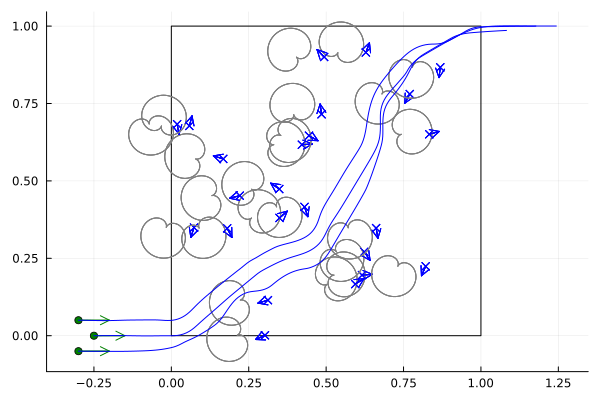

In [38]:
plotscenario(wezes, robots)

for i=1:length(robots)
    if !isnothing(odesols[i])
        plot!(
            τ -> odesols[i](τ)[1], τ -> odesols[i](τ)[2], 0, total_path_length(path), label=false, color=:blue)
    end
end

plot!()

[ Plots | Info ] : Saved animation to /Users/devanshagrawal/research2/14_2025_winter/gatekeeper-formation-flight/GatekeeperFormationFlight/examples/tmp.gif


Plots.AnimatedGif("/Users/devanshagrawal/research2/14_2025_winter/gatekeeper-formation-flight/GatekeeperFormationFlight/examples/tmp.gif")
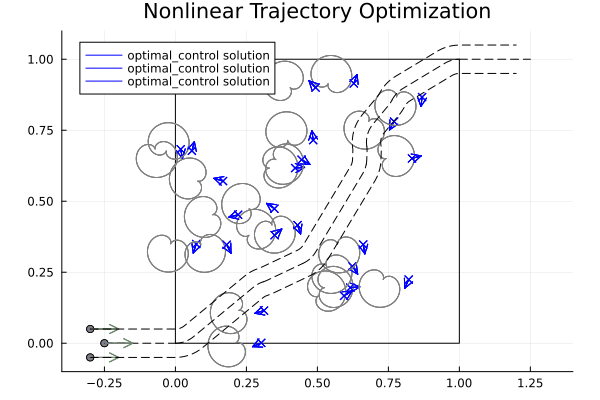

In [39]:
gr()
@gif for t=range(0.0, total_path_length(path), length=120)

    tf = total_path_length(path)
    
    # get the robots at the current time    
    robots_ = [(isnothing(odesols[i]) ? Robot(0.0,0.0,0.0) : Robot(odesols[i](t)) ) for i=1:length(robots)]
    
    # plot reference path
    plotscenario(wezes, robots_)
    plot!(aspect_ratio=:equal)
    for p in path
        plot!(p, color=:black, linestyle=:dash, label=false)
    end
    
    # plot the offset reference point
    for i=1:3
        ref_robot = Robot(get_reference_state(path, t, offsets[i])...)
        plot!(ref_robot; color=:gray, label=false)
    end

    # plot offset path
    for i=2:length(robots)
        plot!(
            τ-> get_reference_state(path, τ, offsets[i])[1], 
            τ-> get_reference_state(path, τ, offsets[i])[2], 
        0.0, tf, linestyle=:dash, color=:black, label=false)
    end
    
    # plot the trajectory so far
    for i=1:length(robots)
        if !isnothing(odesols[i])
            plot!(
                τ -> odesols[i](τ)[1], τ -> odesols[i](τ)[2], 0, t, label="optimal_control solution", color=:blue)
        end
    end

    title!("Nonlinear Trajectory Optimization")
    plot!(xlims=(-0.4, 1.4), ylims=(-0.1, 1.1))
end